In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mnist import MNIST
import time as time
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm

mnist = MNIST('data')

# Necessary format for sklearn
x_train, y_train = mnist.load_training()
x_test, y_test = mnist.load_testing()
x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.int32)
x_test = np.asarray(x_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.int32)

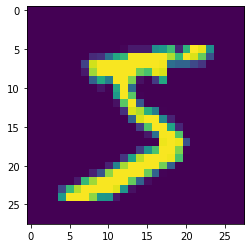

In [29]:


plt.figure()
plt.imshow(x_train[0].reshape(28,28))
plt.show()




In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Using KNN on the training set
def KNNC(x_train, y_train,K, n=1):
    time_array= []
    model = KNeighborsClassifier(n_neighbors=K, metric="euclidean")
    for i in tqdm(range(n)):
        t0 = time.time()
        

        model.fit(x_train, y_train)
        time_array.append(time.time()-t0)
    print("Mean time used: ",round(np.mean(time_array), 2), " seconds")
    return model

knn = KNNC(x_train, y_train,3, 5)

y_pred = knn.predict(x_test)



conf_mat = confusion_matrix(y_test, y_pred)
reports = classification_report(y_test, y_pred)

100%|██████████| 5/5 [00:00<00:00, 18.71it/s]


Mean time used:  0.05  seconds


0.9705
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



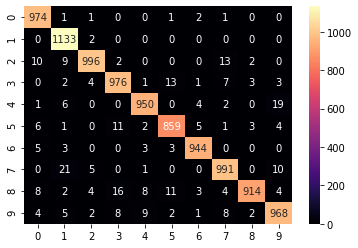

In [31]:
import seaborn as sb
correct = np.sum(np.diag(conf_mat))
N_test = 10000
print(correct/N_test)
heatmap = sb.heatmap(conf_mat, annot=True, fmt="d", cmap ="magma")
print(reports)

True: 4 Predicted: 9


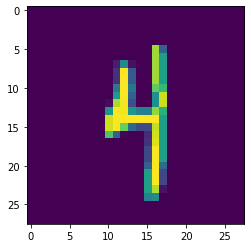

In [32]:

def show_missclassified(num):
    missed = 0
    for i in range(len(y_pred)):
        if y_pred[i]!=y_test[i]:
            missed += 1
            print("True:", y_test[i], "Predicted:", y_pred[i])
            plt.figure(i)
            plt.imshow(x_test[i].reshape(28,28))
            plt.show()
        if missed == num:
            break
            
            

show_missclassified(1)

True: 7 Predicted: 7


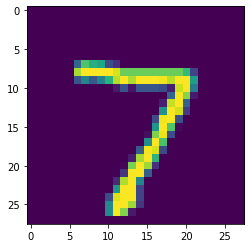

In [33]:
def show_classified(num):
    missed = 0
    for i in range(len(y_pred)):
        if y_pred[i]==y_test[i]:
            missed += 1
            print("True:", y_test[i], "Predicted:", y_pred[i])
            plt.figure(i)
            plt.imshow(x_test[i].reshape(28,28))
            plt.show()
        if missed == num:
            break
            
show_classified(1)    

In [34]:


def get_class(x,y):
    classes = {}
    for key in np.unique(y):
        classes[key] = []
    for key, data in zip(y,x):
        classes[key].append(data)
    return classes
        
from sklearn.cluster import KMeans

def create_templates(classes):
    
    k_means = KMeans(n_clusters=64)
    items = tqdm(classes.items())
    
    templates = {}
    for key, data in items:
        classes_kmeans = k_means.fit(data)
        template_data = classes_kmeans.cluster_centers_
        templates[key] = template_data

        
    return templates


classes = get_class(x_train, y_train)

templates = create_templates(classes)


100%|██████████| 10/10 [02:28<00:00, 14.84s/it]


In [35]:
template_xtrain = []
template_ytrain = []

for key,data in templates.items():
    template_ytrain.extend([key]*len(data))
    template_xtrain.extend(data)

cluster_knn = KNNC(template_xtrain,template_ytrain,3,5)
y_pred = cluster_knn.predict(x_test)

print(delta_time)


100%|██████████| 5/5 [00:00<00:00, 147.79it/s]


Mean time used:  0.01  seconds
3.123025894165039


0.9416
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.93      0.99      0.96      1135
           2       0.94      0.94      0.94      1032
           3       0.93      0.94      0.94      1010
           4       0.93      0.92      0.92       982
           5       0.94      0.94      0.94       892
           6       0.97      0.96      0.97       958
           7       0.96      0.91      0.93      1028
           8       0.96      0.90      0.93       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



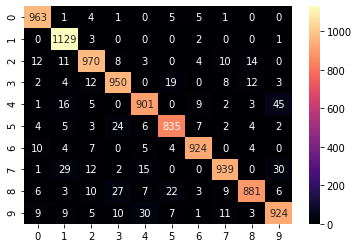

In [36]:
conf_mat = confusion_matrix(y_test, y_pred)
reports = classification_report(y_test, y_pred)
correct = np.sum(np.diag(conf_mat))
N_test = 10000
print(correct/N_test)
heatmap = sb.heatmap(conf_mat, annot=True, fmt="d", cmap ="magma")
print(reports)

In [37]:
for i in range(1):
    print(i)

0


100%|██████████| 5/5 [00:00<00:00, 22.78it/s]


Mean time used:  0.04  seconds
0.9416
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.95      1.00      0.97      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



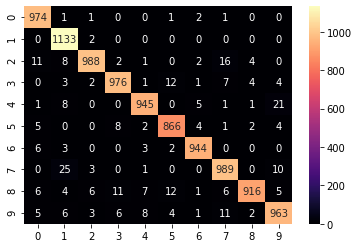

In [38]:
knn7 = KNNC(x_train, y_train,7, 5)

y_pred = knn7.predict(x_test)



conf_mat = confusion_matrix(y_test, y_pred)
reports = classification_report(y_test, y_pred)

print(correct/N_test)
heatmap = sb.heatmap(conf_mat, annot=True, fmt="d", cmap ="magma")
print(reports)

In [40]:
t0= time.time()  
y_pred = cluster_knn.predict(x_test[:1000])
delta_time = time.time() - t0
print("Prediction time (K=7): ",round(delta_time,2),"s")
t0= time.time()  
y_pred = knn.predict(x_test[:1000])
delta_time = time.time() - t0
print("Prediction time (K=7): ",round(delta_time,2),"s")
t0= time.time()  
y_pred = knn7.predict(x_test[:1000])
delta_time = time.time() - t0
print("Prediction time (K=7): ",round(delta_time,2),"s")

Prediction time (K=7):  0.13 s
Prediction time (K=7):  2.7 s
Prediction time (K=7):  3.09 s
